# 2D 数据类别划分
任务：
1、采用 Kmeans 算法实现 2D 数据自动聚类，预测 V1 = 80, V2 = 60 的数据类别；
2、计算预测准确率，完成结果矫正；
3、采用 KNN、Meanshift 算法，重复步骤 1-2
数据：data.csv

In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [4]:
# define X and y
X = data.drop(['labels'], axis=1)
y = data.loc[:, 'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [5]:
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

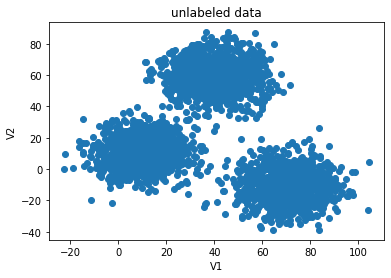

In [6]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:, 'V1'], X.loc[:, 'V2'])
plt.title('unlabeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

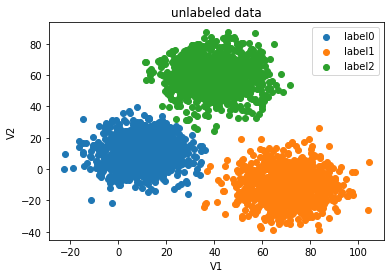

In [8]:
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])
plt.title('unlabeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.show()

In [10]:
# set up the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [11]:
centers = KM.cluster_centers_

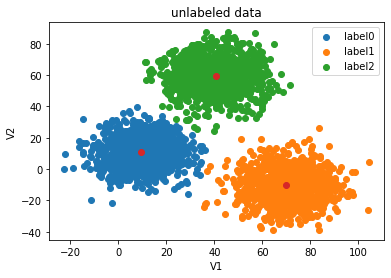

In [13]:
fig3 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])
plt.title('unlabeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [14]:
# test data: V1 = 80, V2 = 60
y_predict_test = KM.predict([[80, 60]])
print(y_predict_test)

[1]


D:\anaconda3\envs\learn_ai\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [15]:
# predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict))

1    1149
0     952
2     899
dtype: int64


In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.0023333333333333335


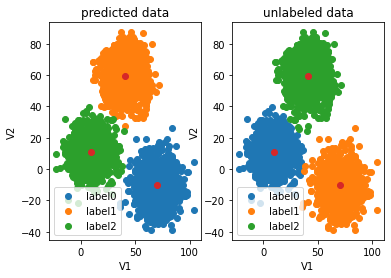

In [18]:
# visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict == 0], X.loc[:, 'V2'][y_predict == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict == 1], X.loc[:, 'V2'][y_predict == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict == 2], X.loc[:, 'V2'][y_predict == 2])
plt.title('predicted data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])
plt.title('unlabeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [19]:
# correct the results
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(1)
    elif i == 1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected))

2    1149
1     952
0     899
dtype: int64


In [20]:
print(accuracy_score(y, y_corrected))

0.997


In [21]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


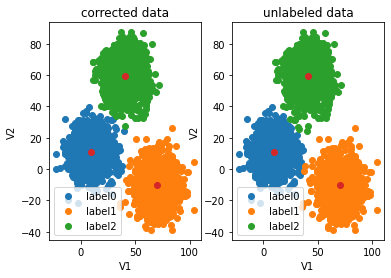

In [22]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_corrected == 0], X.loc[:, 'V2'][y_corrected == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y_corrected == 1], X.loc[:, 'V2'][y_corrected == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y_corrected == 2], X.loc[:, 'V2'][y_corrected == 2])
plt.title('corrected data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])
plt.title('unlabeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()